# Classification of Defects on Wafer Maps Using Deep Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data = pd.read_pickle('LSWMD.pkl')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


# ----------------------------------------Exploring the data-----------------------------------------------

In [7]:
data.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [9]:
data.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [11]:
data.shape

(811457, 6)

# Converting np.ndarray columns to scalar values

In [17]:
data[['trianTestLabel']] = data[['trianTestLabel']].applymap(lambda x: x[0] if isinstance(x, np.ndarray) and x.size == 1 else (None if isinstance(x, np.ndarray) else x))

In [18]:
data.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,[[none]]


In [25]:
data[['failureType']] = data[['failureType']].applymap(lambda x: x[0] if isinstance(x, np.ndarray) and x.size == 1 else (None if isinstance(x, np.ndarray) else x))

In [26]:
data.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [29]:
data.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,None,None
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,None,None


In [119]:
import numpy as np

In [196]:
data_failureType_None = data[(data['failureType'] != 'none') & (data['failureType'] != 'Edge-Ring') & (data['failureType'] != 'Edge-Loc') & (data['failureType'] != 'Center') &
(data['failureType'] != 'Loc') & (data['failureType'] != 'Scratch') & (data['failureType'] != 'Random') & (data['failureType'] != 'Donut') & (data['failureType'] != 'Near-full')]

In [198]:
data.failureType.value_counts()

failureType
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64

In [215]:
data_failureType_None.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
35,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,11.0,None,None
45,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,21.0,None,None
69,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,20.0,None,None
120,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,21.0,None,None
158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...",533.0,lot7,9.0,None,None


In [217]:
data_failureType_None.shape

(638507, 6)

In [219]:
output_dir = 'None_99'
os.makedirs(output_dir, exist_ok=True)

In [221]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_None[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'None-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [31]:
data.failureType.value_counts()

failureType
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64

# converting 2d array of failureType 'none' to images

In [206]:
output_dir = 'none-dupli'
os.makedirs(output_dir, exist_ok=True)

In [208]:
data_failureType_none = data[data['failureType'] == 'none']

In [210]:
data_failureType_none.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [212]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_none[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis


      
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'none-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

# converting 2d array of failureType 'Edge-Ring' to images

In [153]:
output_dir = 'EdgeRing'
os.makedirs(output_dir, exist_ok=True)

In [33]:
data_failureType_Edge_Ring = data[data['failureType'] == 'Edge-Ring']

In [35]:
data_failureType_Edge_Ring.shape

(9680, 6)

In [155]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Edge_Ring[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'EdgeRing-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


Saved EdgeRing\EdgeRing-(100).jpg
Saved EdgeRing\EdgeRing-(186).jpg
Saved EdgeRing\EdgeRing-(3445).jpg
Saved EdgeRing\EdgeRing-(4562).jpg
Saved EdgeRing\EdgeRing-(4845).jpg
Saved EdgeRing\EdgeRing-(5107).jpg
Saved EdgeRing\EdgeRing-(5358).jpg
Saved EdgeRing\EdgeRing-(6071).jpg
Saved EdgeRing\EdgeRing-(6085).jpg
Saved EdgeRing\EdgeRing-(6673).jpg
Saved EdgeRing\EdgeRing-(6917).jpg
Saved EdgeRing\EdgeRing-(7011).jpg
Saved EdgeRing\EdgeRing-(8078).jpg
Saved EdgeRing\EdgeRing-(8080).jpg
Saved EdgeRing\EdgeRing-(8086).jpg
Saved EdgeRing\EdgeRing-(8206).jpg
Saved EdgeRing\EdgeRing-(8213).jpg
Saved EdgeRing\EdgeRing-(8384).jpg
Saved EdgeRing\EdgeRing-(8390).jpg
Saved EdgeRing\EdgeRing-(8409).jpg
Saved EdgeRing\EdgeRing-(8414).jpg
Saved EdgeRing\EdgeRing-(8454).jpg
Saved EdgeRing\EdgeRing-(8634).jpg
Saved EdgeRing\EdgeRing-(8637).jpg
Saved EdgeRing\EdgeRing-(8642).jpg
Saved EdgeRing\EdgeRing-(8658).jpg
Saved EdgeRing\EdgeRing-(8660).jpg
Saved EdgeRing\EdgeRing-(8663).jpg
Saved EdgeRing\EdgeRin

# converting 2d array of failureType 'Edge-Loc' to images

In [143]:
output_dir = 'EdgeLoc'
os.makedirs(output_dir, exist_ok=True)

In [37]:
data_failureType_Edge_Loc = data[data['failureType'] == 'Edge-Loc']

In [39]:
data_failureType_Edge_Loc.shape

(5189, 6)

In [145]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Edge_Loc[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'EdgeLoc-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


Saved EdgeLoc\EdgeLoc-(36).jpg
Saved EdgeLoc\EdgeLoc-(37).jpg
Saved EdgeLoc\EdgeLoc-(38).jpg
Saved EdgeLoc\EdgeLoc-(39).jpg
Saved EdgeLoc\EdgeLoc-(41).jpg
Saved EdgeLoc\EdgeLoc-(42).jpg
Saved EdgeLoc\EdgeLoc-(43).jpg
Saved EdgeLoc\EdgeLoc-(48).jpg
Saved EdgeLoc\EdgeLoc-(264).jpg
Saved EdgeLoc\EdgeLoc-(377).jpg
Saved EdgeLoc\EdgeLoc-(381).jpg
Saved EdgeLoc\EdgeLoc-(397).jpg
Saved EdgeLoc\EdgeLoc-(446).jpg
Saved EdgeLoc\EdgeLoc-(477).jpg
Saved EdgeLoc\EdgeLoc-(486).jpg
Saved EdgeLoc\EdgeLoc-(666).jpg
Saved EdgeLoc\EdgeLoc-(787).jpg
Saved EdgeLoc\EdgeLoc-(808).jpg
Saved EdgeLoc\EdgeLoc-(832).jpg
Saved EdgeLoc\EdgeLoc-(952).jpg
Saved EdgeLoc\EdgeLoc-(1025).jpg
Saved EdgeLoc\EdgeLoc-(1190).jpg
Saved EdgeLoc\EdgeLoc-(1232).jpg
Saved EdgeLoc\EdgeLoc-(1334).jpg
Saved EdgeLoc\EdgeLoc-(1463).jpg
Saved EdgeLoc\EdgeLoc-(1510).jpg
Saved EdgeLoc\EdgeLoc-(1515).jpg
Saved EdgeLoc\EdgeLoc-(1910).jpg
Saved EdgeLoc\EdgeLoc-(2002).jpg
Saved EdgeLoc\EdgeLoc-(2019).jpg
Saved EdgeLoc\EdgeLoc-(2043).jpg
Saved

# converting 2d array of failureType 'Center' to images

In [41]:
data_failureType_Center = data[data['failureType'] == 'Center']

In [43]:
data_failureType_Center.shape

(4294, 6)

In [133]:
output_dir = 'Center'
os.makedirs(output_dir, exist_ok=True)

In [135]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Center[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'Center-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


Saved Center\Center-(44).jpg
Saved Center\Center-(49).jpg
Saved Center\Center-(604).jpg
Saved Center\Center-(729).jpg
Saved Center\Center-(893).jpg
Saved Center\Center-(2603).jpg
Saved Center\Center-(3837).jpg
Saved Center\Center-(4419).jpg
Saved Center\Center-(4890).jpg
Saved Center\Center-(5336).jpg
Saved Center\Center-(5949).jpg
Saved Center\Center-(5954).jpg
Saved Center\Center-(6624).jpg
Saved Center\Center-(7068).jpg
Saved Center\Center-(7279).jpg
Saved Center\Center-(7281).jpg
Saved Center\Center-(7284).jpg
Saved Center\Center-(7287).jpg
Saved Center\Center-(7289).jpg
Saved Center\Center-(7290).jpg
Saved Center\Center-(7291).jpg
Saved Center\Center-(7292).jpg
Saved Center\Center-(7293).jpg
Saved Center\Center-(7295).jpg
Saved Center\Center-(7297).jpg
Saved Center\Center-(80740).jpg
Saved Center\Center-(83418).jpg
Saved Center\Center-(83419).jpg
Saved Center\Center-(83420).jpg
Saved Center\Center-(84097).jpg
Saved Center\Center-(84100).jpg
Saved Center\Center-(84106).jpg
Saved Ce

# converting 2d array of failureType 'Loc' to images

In [119]:
output_dir = 'Loc'
os.makedirs(output_dir, exist_ok=True)

In [45]:
data_failureType_Loc = data[data['failureType'] == 'Loc']

In [47]:
data_failureType_Loc.shape

(3593, 6)

Saved Loc\Loc-(19).jpg
Saved Loc\Loc-(40).jpg
Saved Loc\Loc-(47).jpg
Saved Loc\Loc-(73).jpg
Saved Loc\Loc-(646).jpg
Saved Loc\Loc-(680).jpg
Saved Loc\Loc-(824).jpg
Saved Loc\Loc-(1048).jpg
Saved Loc\Loc-(1242).jpg
Saved Loc\Loc-(1574).jpg
Saved Loc\Loc-(1660).jpg
Saved Loc\Loc-(1767).jpg
Saved Loc\Loc-(1962).jpg
Saved Loc\Loc-(1999).jpg
Saved Loc\Loc-(2126).jpg
Saved Loc\Loc-(2146).jpg
Saved Loc\Loc-(2631).jpg
Saved Loc\Loc-(2638).jpg
Saved Loc\Loc-(2919).jpg
Saved Loc\Loc-(3292).jpg
Saved Loc\Loc-(3294).jpg
Saved Loc\Loc-(3297).jpg
Saved Loc\Loc-(3487).jpg
Saved Loc\Loc-(3633).jpg
Saved Loc\Loc-(3652).jpg
Saved Loc\Loc-(3657).jpg
Saved Loc\Loc-(3803).jpg
Saved Loc\Loc-(4040).jpg
Saved Loc\Loc-(4148).jpg
Saved Loc\Loc-(4401).jpg
Saved Loc\Loc-(4508).jpg
Saved Loc\Loc-(4635).jpg
Saved Loc\Loc-(4647).jpg
Saved Loc\Loc-(4956).jpg
Saved Loc\Loc-(4987).jpg
Saved Loc\Loc-(5315).jpg
Saved Loc\Loc-(5357).jpg
Saved Loc\Loc-(5544).jpg
Saved Loc\Loc-(5548).jpg
Saved Loc\Loc-(5758).jpg
Saved Loc\L

KeyboardInterrupt: 

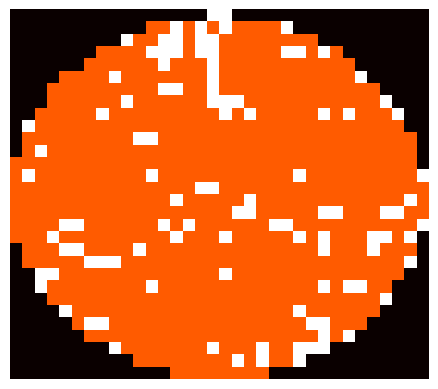

In [129]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Loc[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'Loc-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


# converting 2d array of failureType 'Scratch' to images

In [59]:
import os
output_dir = 'Scratch'
os.makedirs(output_dir, exist_ok=True)

In [61]:
data_failureType_Scratch = data[data['failureType'] == 'Scratch']

In [63]:
data_failureType_Scratch.shape

(1193, 6)

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Scratch[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'Scratch-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


# converting 2d array of failureType 'Random' to images

In [71]:
output_dir = 'Random'
os.makedirs(output_dir, exist_ok=True)

In [67]:
data_failureType_Random = data[data['failureType'] == 'Random']

In [69]:
data_failureType_Random.shape

(866, 6)

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Random[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'Random-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


Saved Random\Random-(602).jpg
Saved Random\Random-(983).jpg
Saved Random\Random-(1199).jpg
Saved Random\Random-(1562).jpg
Saved Random\Random-(1721).jpg
Saved Random\Random-(2100).jpg
Saved Random\Random-(2270).jpg
Saved Random\Random-(2271).jpg
Saved Random\Random-(3423).jpg
Saved Random\Random-(3760).jpg
Saved Random\Random-(3773).jpg
Saved Random\Random-(3843).jpg
Saved Random\Random-(3917).jpg
Saved Random\Random-(3939).jpg
Saved Random\Random-(4073).jpg
Saved Random\Random-(4132).jpg
Saved Random\Random-(4195).jpg
Saved Random\Random-(4233).jpg
Saved Random\Random-(4788).jpg
Saved Random\Random-(6721).jpg
Saved Random\Random-(7186).jpg
Saved Random\Random-(7382).jpg
Saved Random\Random-(16869).jpg
Saved Random\Random-(16870).jpg
Saved Random\Random-(16872).jpg
Saved Random\Random-(18062).jpg
Saved Random\Random-(18063).jpg
Saved Random\Random-(18064).jpg
Saved Random\Random-(18065).jpg
Saved Random\Random-(18066).jpg
Saved Random\Random-(18067).jpg
Saved Random\Random-(18068).jpg


In [75]:
data_failureType_Donut = data[data['failureType'] == 'Donut']

In [77]:
data_failureType_Donut.shape

(555, 6)

# converting 2d array of failureType 'Donut' to images

In [75]:
output_dir = 'Donut'
os.makedirs(output_dir, exist_ok=True)

In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Donut[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'Donut-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


Saved Donut\Donut-(7316).jpg
Saved Donut\Donut-(7334).jpg
Saved Donut\Donut-(7335).jpg
Saved Donut\Donut-(7338).jpg
Saved Donut\Donut-(7339).jpg
Saved Donut\Donut-(7340).jpg
Saved Donut\Donut-(7342).jpg
Saved Donut\Donut-(7346).jpg
Saved Donut\Donut-(7348).jpg
Saved Donut\Donut-(7877).jpg
Saved Donut\Donut-(7878).jpg
Saved Donut\Donut-(7905).jpg
Saved Donut\Donut-(7906).jpg
Saved Donut\Donut-(7907).jpg
Saved Donut\Donut-(7934).jpg
Saved Donut\Donut-(7936).jpg
Saved Donut\Donut-(7938).jpg
Saved Donut\Donut-(7939).jpg
Saved Donut\Donut-(7947).jpg
Saved Donut\Donut-(7948).jpg
Saved Donut\Donut-(7949).jpg
Saved Donut\Donut-(7950).jpg
Saved Donut\Donut-(8103).jpg
Saved Donut\Donut-(9606).jpg
Saved Donut\Donut-(9608).jpg
Saved Donut\Donut-(11813).jpg
Saved Donut\Donut-(28885).jpg
Saved Donut\Donut-(31704).jpg
Saved Donut\Donut-(31707).jpg
Saved Donut\Donut-(34024).jpg
Saved Donut\Donut-(46509).jpg
Saved Donut\Donut-(46533).jpg
Saved Donut\Donut-(49448).jpg
Saved Donut\Donut-(49451).jpg
Saved

In [83]:
data_failureType_Near_full = data[data['failureType'] == 'Near-full']

In [85]:
data_failureType_Near_full.shape

(149, 6)

# converting 2d array of failureType 'Near-full' to images

In [60]:
# Ensure the output directory exists
output_dir = 'NearFull'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
data_failureType_Near_full.shape

In [62]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Assuming `data` is your DataFrame and 'waferMap' is the column with 2D arrays
# Also assuming 'label' is the column with labels

# Create a directory to save images if it doesn't exist
#output_dir = os.getcwd()  # Save in current directory
#os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the dataset
for index, row in data_failureType_Near_full[['waferMap']].iterrows():
    image_array = row['waferMap']
    #label = row['label']
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Display the image data with a colormap (e.g., 'viridis' or 'inferno')
    cax = ax.imshow(image_array, cmap='hot')  # Change 'viridis' to any other colormap if needed
    
    # Add label to the image
    #ax.text(0.5, -0.1, label, transform=ax.transAxes, ha='center', va='top', fontsize=12, color='black')

    # Remove axis for a cleaner look
    ax.axis('off')
    
    # Save the image
    image_path = os.path.join(output_dir, f'NearFull-({index}).jpg')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0, format='jpg')
    
    # Close the figure to free memory
    plt.close(fig)
    
    #print(f'Saved {image_path}')


Saved NearFull\NearFull-(929).jpg
Saved NearFull\NearFull-(2219).jpg
Saved NearFull\NearFull-(3143).jpg
Saved NearFull\NearFull-(3541).jpg
Saved NearFull\NearFull-(3980).jpg
Saved NearFull\NearFull-(4297).jpg
Saved NearFull\NearFull-(5372).jpg
Saved NearFull\NearFull-(6340).jpg
Saved NearFull\NearFull-(243685).jpg
Saved NearFull\NearFull-(245311).jpg
Saved NearFull\NearFull-(247177).jpg
Saved NearFull\NearFull-(247430).jpg
Saved NearFull\NearFull-(247675).jpg
Saved NearFull\NearFull-(248536).jpg
Saved NearFull\NearFull-(249130).jpg
Saved NearFull\NearFull-(250154).jpg
Saved NearFull\NearFull-(250192).jpg
Saved NearFull\NearFull-(250250).jpg
Saved NearFull\NearFull-(250273).jpg
Saved NearFull\NearFull-(250366).jpg
Saved NearFull\NearFull-(251646).jpg
Saved NearFull\NearFull-(251713).jpg
Saved NearFull\NearFull-(252705).jpg
Saved NearFull\NearFull-(255069).jpg
Saved NearFull\NearFull-(256910).jpg
Saved NearFull\NearFull-(439565).jpg
Saved NearFull\NearFull-(641334).jpg
Saved NearFull\Nea